In [60]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import hvplot.pandas


In [61]:
# Reading csv files
evdata= pd.read_csv('Cleaned_Data_Sets/Cleaned_EV_Data.csv')
evdata.head()

County       City State  Postal Code  Model Year   Make    Model  \
0     Yakima     Yakima    WA      98908.0        2020  TESLA  MODEL 3   
1  San Diego  San Diego    CA      92101.0        2019  TESLA  MODEL 3   
2       Lane     Eugene    OR      97404.0        2021  VOLVO      S60   
3     Yakima     Yakima    WA      98908.0        2019  TESLA  MODEL X   
4  Snohomish    Bothell    WA      98021.0        2017    BMW       X5   

                    Electric Vehicle Type  Electric Range  \
0          Battery Electric Vehicle (BEV)             322   
1          Battery Electric Vehicle (BEV)             220   
2  Plug-in Hybrid Electric Vehicle (PHEV)              22   
3          Battery Electric Vehicle (BEV)             289   
4  Plug-in Hybrid Electric Vehicle (PHEV)              14   

   Vehicle Location Longitude  Vehicle Location Latitude  
0                  -120.56916                   46.58514  
1                  -117.16171                   32.71568  
2                  -123.12802                   44.09573  
3                  -120.56916                   46.58514  
4                  -122.18384                   47.80310

In [62]:
# Looking at data to determine cleansing needs
evdata.count()

County                        124714
City                          124714
State                         124716
Postal Code                   124714
Model Year                    124716
Make                          124716
Model                         124535
Electric Vehicle Type         124716
Electric Range                124716
Vehicle Location Longitude    124687
Vehicle Location Latitude     124687
dtype: int64

In [63]:
# Cleaning the data to remove 'null' and '0' values
cleansed_evdata= evdata.dropna(how= 'any')
pandc_evdata= cleansed_evdata.loc[cleansed_evdata['Electric Range'] != 0]
pandc_evdata.count()

County                        75013
City                          75013
State                         75013
Postal Code                   75013
Model Year                    75013
Make                          75013
Model                         75013
Electric Vehicle Type         75013
Electric Range                75013
Vehicle Location Longitude    75013
Vehicle Location Latitude     75013
dtype: int64

In [64]:
# Isolating Electric Vehicle Battery types and Electric Ranges for comparison
batt_reduced_df=pandc_evdata[['Electric Range',
                              'Electric Vehicle Type']]
batt_reduced_df

Electric Range                   Electric Vehicle Type
0                  322          Battery Electric Vehicle (BEV)
1                  220          Battery Electric Vehicle (BEV)
2                   22  Plug-in Hybrid Electric Vehicle (PHEV)
3                  289          Battery Electric Vehicle (BEV)
4                   14  Plug-in Hybrid Electric Vehicle (PHEV)
...                ...                                     ...
124707              25  Plug-in Hybrid Electric Vehicle (PHEV)
124708              72  Plug-in Hybrid Electric Vehicle (PHEV)
124712              26  Plug-in Hybrid Electric Vehicle (PHEV)
124714             238          Battery Electric Vehicle (BEV)
124715              38  Plug-in Hybrid Electric Vehicle (PHEV)

[75013 rows x 2 columns]

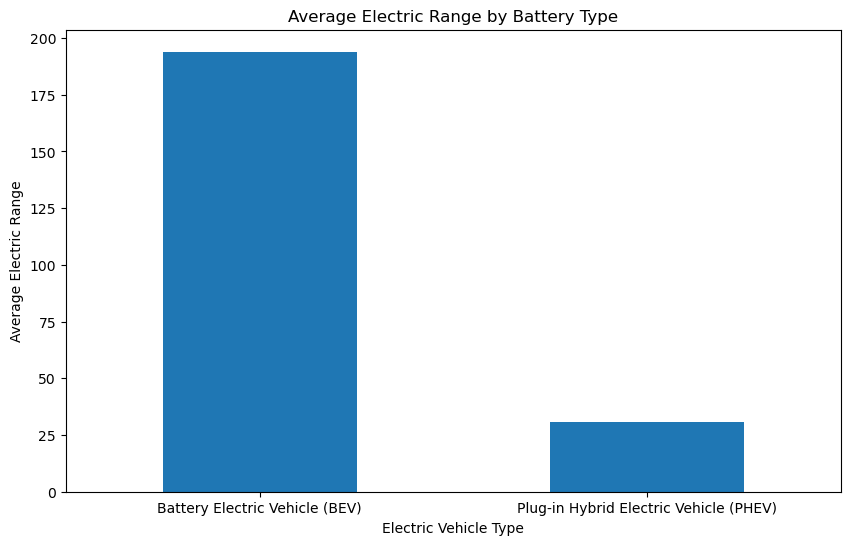

In [65]:
# Plotting BEV vs PHEV data
batt_comp = batt_reduced_df.groupby('Electric Vehicle Type')['Electric Range'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
batt_comp.plot(kind='bar')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Electric Range')
plt.title('Average Electric Range by Battery Type')
plt.xticks(rotation=0)
plt.show()

In [66]:
# Data sort to align make and average electric range
make_data_comp = pandc_evdata.groupby(['Make',
                                       'Model',
                                       'Electric Vehicle Type'])['Electric Range'].mean().reset_index()
make_data_comp.head()

Make             Model                   Electric Vehicle Type  \
0  AUDI                A3  Plug-in Hybrid Electric Vehicle (PHEV)   
1  AUDI                A7  Plug-in Hybrid Electric Vehicle (PHEV)   
2  AUDI              A8 E  Plug-in Hybrid Electric Vehicle (PHEV)   
3  AUDI            E-TRON          Battery Electric Vehicle (BEV)   
4  AUDI  E-TRON SPORTBACK          Battery Electric Vehicle (BEV)   

   Electric Range  
0       16.000000  
1       24.000000  
2       17.000000  
3      208.408163  
4      218.000000

In [67]:
# Sorting to find the top 5 ranges and make
# Sort top 5 PHEV makes
top_5_phev = make_data_comp[make_data_comp['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
top_5_phev = top_5_phev.sort_values('Electric Range',
                                     ascending=False).head(10)

# Sort top 5 BEV makes
top_5_bev = make_data_comp[make_data_comp['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
top_5_bev = top_5_bev.sort_values('Electric Range', 
                                  ascending=False).head(10)

C:\Users\edmon\AppData\Local\Temp\ipykernel_40428\1570983290.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(),


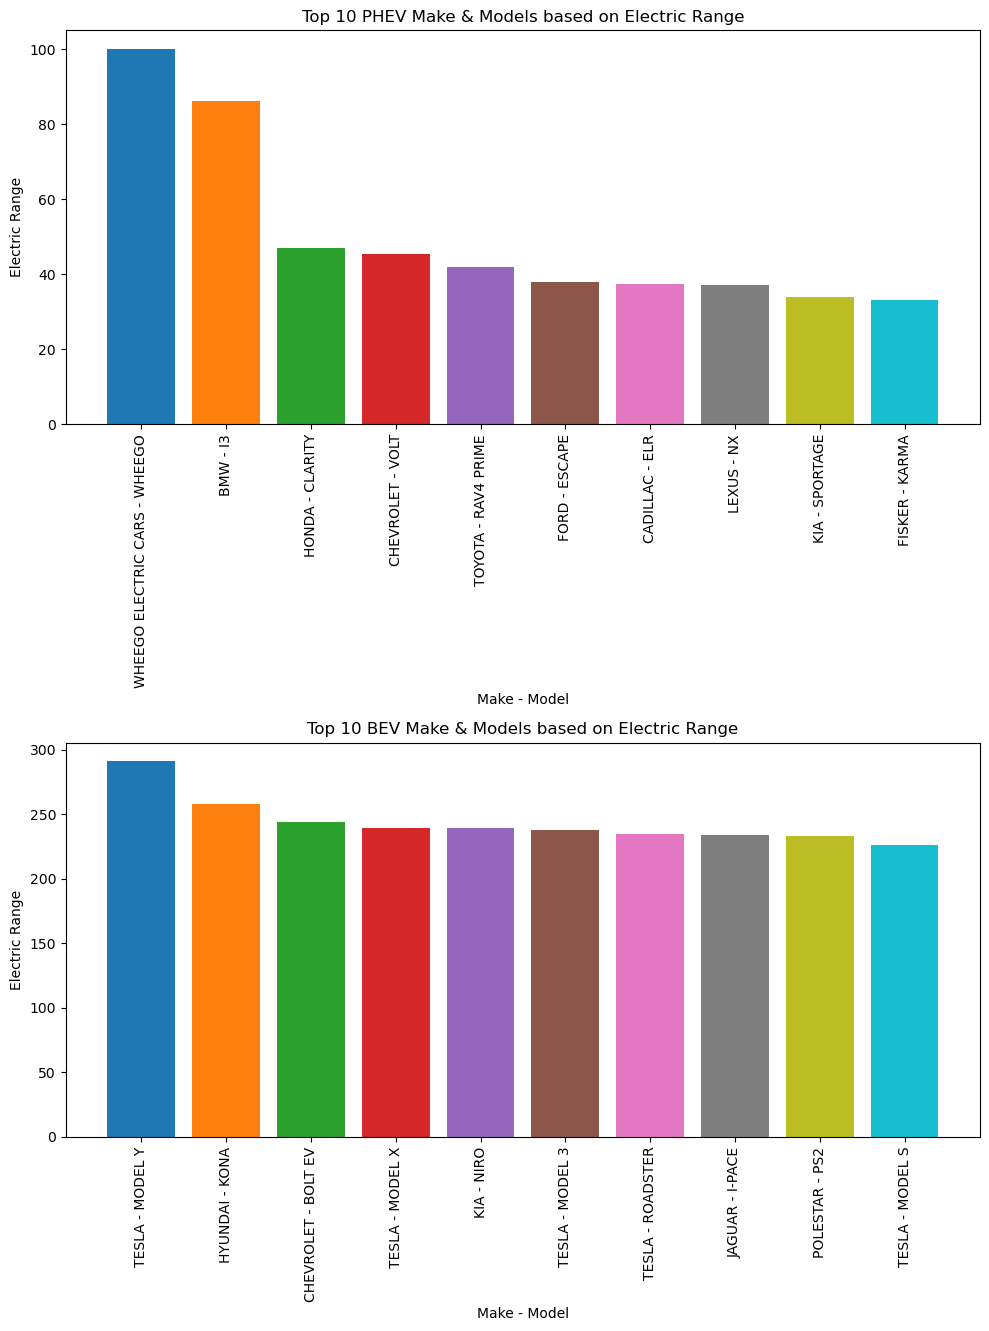

In [68]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot top 5 PHEV makes with model information
for i, (_, row) in enumerate(top_5_phev.iterrows()):
    axs[0].bar(row['Make'] + ' - ' + row['Model'],
               row['Electric Range'], 
               label=row['Model'])

axs[0].set_title('Top 10 PHEV Make & Models based on Electric Range')
axs[0].set_xlabel('Make - Model')
axs[0].set_ylabel('Electric Range')
axs[0].set_xticklabels(axs[0].get_xticklabels(),
                    rotation=90)

# Plot top 5 BEV makes with model information
for i, (_, row) in enumerate(top_5_bev.iterrows()):
    axs[1].bar(row['Make'] + ' - ' + row['Model'], 
               row['Electric Range'], 
               label=row['Model'])

axs[1].set_title('Top 10 BEV Make & Models based on Electric Range')
axs[1].set_xlabel('Make - Model')
axs[1].set_ylabel('Electric Range')

# Adjust spacing between subplots
plt.tight_layout()

# Set x-axis tick label rotation angle
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [69]:
# Bringing in the census data to create map of ev models by county
census_data= pd.read_csv('Cleaned_Data_Sets/Cleaned_Census_Income_Data.csv')
census_data.head()

County  Median income (dollars)
0    Adams                    51601
1   Asotin                    53941
2   Benton                    72046
3   Chelan                    61304
4  Clallam                    55090

In [70]:
# Recall original dataset for merge
county_mapping= pandc_evdata.groupby(['Make',
                                      'Model',
                                      'Electric Vehicle Type',
                                      'County'])['Electric Range'].mean().reset_index()
county_mapping.head()

# Merging census data with current data
merged_ev_data= pd.merge(county_mapping, 
                         census_data, 
                         on= 'County', 
                         how= 'inner')
merged_ev_data

Make       Model                   Electric Vehicle Type    County  \
0          AUDI          A3  Plug-in Hybrid Electric Vehicle (PHEV)     Adams   
1           BMW          I3  Plug-in Hybrid Electric Vehicle (PHEV)     Adams   
2     CHEVROLET     BOLT EV          Battery Electric Vehicle (BEV)     Adams   
3     CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)     Adams   
4      CHRYSLER    PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)     Adams   
...         ...         ...                                     ...       ...   
1421      VOLVO        XC90  Plug-in Hybrid Electric Vehicle (PHEV)  Columbia   
1422       FORD       C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)  Garfield   
1423       FORD      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)  Garfield   
1424      TESLA     MODEL 3          Battery Electric Vehicle (BEV)  Garfield   
1425     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)  Garfield   

      Electric Range  Median income (dollars)  
0               16.0                    51601  
1               97.0                    51601  
2              248.5                    51601  
3               41.0                    51601  
4               32.0                    51601  
...              ...                      ...  
1421            18.0                    61779  
1422            19.0                    56923  
1423            19.0                    56923  
1424           215.0                    56923  
1425            42.0                    56923  

[1426 rows x 6 columns]

In [80]:
# Create the map
washington_map = pandc_evdata.hvplot.points(
    x= 'Vehicle Location Longitude',
    y= 'Vehicle Location Latitude',
    c= 'Make',
    title= 'Electric Vehicles by Make in Washington',
    geo= True,
    tiles= 'OSM',
    frame_width= 1200,
    frame_height= 850,
    alpha= 0.5,
    hover_cols= ['Make','Model','Electric Range','County'],
    size= 50,
    legend= 'top_left'
)

# Show the map
washington_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Vehicle Location Longitude,Vehicle Location Latitude]   (Make,Model,Electric Range,County)